In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
# Replace 'sales_data.csv' with your actual CSV file name
df = pd.read_csv("Linear_data.csv")
df.head()

,Date,Product,Quantity,Revenue
0,01/01/2024,Mobile,10,15000
1,02/01/2024,Laptop,5,40000
2,03/01/2024,Tablet,7,21000
3,04/01/2024,Mobile,8,12000


In [20]:
# Date column ko datetime me convert karein
df['Date'] = pd.to_datetime(df['Date'])

# Null values ko handle karo
df = df.dropna()

# Feature Engineering: Date ko numeric me convert karo
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Final input and output columns
X = df[['Date_ordinal', 'Quantity']]
y = df['Revenue']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

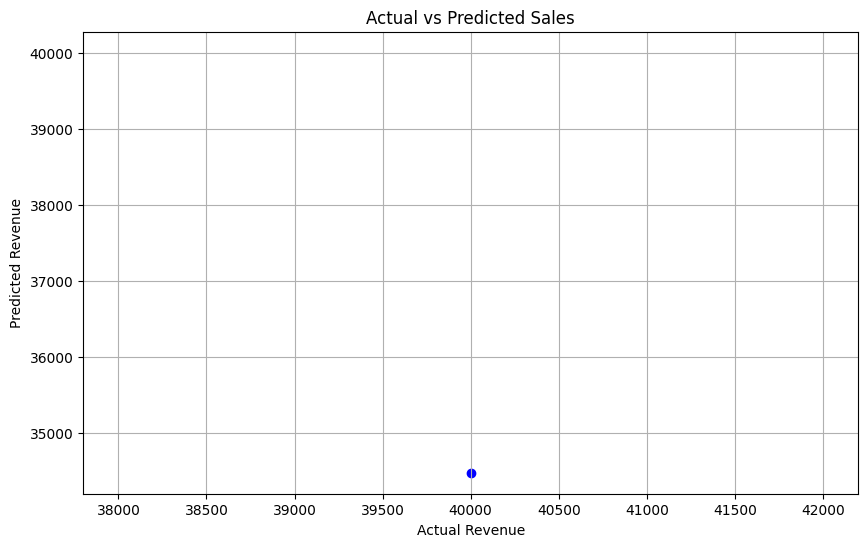

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

In [24]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 30574394.463561192
